In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcYW1hemVsXERlc2t0b3BcaXVibF9wdWJsaXNoaW5nXHByYWN0aWNlX3ZlcnNpb25zXGNvbXB1dGF0aW9uYWxfc2Nob2xhcmx5X2VkaXRpb24='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\zipimport.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\codecs.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\aliases.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\__init__.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\abc.py": 1686132018.0, "C:\\Users\\amazel\\AppData\\Local\\Programs\\Pyth

In [2]:
#| label: imports_analysis
from pathlib import Path
import re
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import spacy
import time
from geopy.geocoders import Nominatim
import folium
from IPython.display import IFrame, display

# Ensure data dir
Path("data").mkdir(exist_ok=True)

In [3]:
#| label: load_clean_witness
# Read the clean witness and split on markers like [CHAPTER 01], [PREFACE]
clean_path = Path("resources/dracula_clean.txt")
txt = clean_path.read_text(encoding="utf-8")

parts = re.split(r'(?m)^\[(PREFACE|CHAPTER\s+\d{2}|FULL_TEXT)\]\s*$', txt, flags=re.IGNORECASE)
if len(parts) < 3:
    # fallback: try simpler split on lines starting with [CHAPTER
    split_points = re.split(r'(?m)^\[CHAPTER\s+\d+\]', txt)
    chapters = []
    for i, block in enumerate(split_points, start=1):
        chapters.append({"chapter": i, "marker": f"CHAPTER {i:02d}", "text": block.strip()})
else:
    chapters = []
    i = 1
    for j in range(1, len(parts), 2):
        marker = parts[j].strip()
        body = parts[j+1].strip() if j+1 < len(parts) else ""
        m = re.search(r'CHAPTER\s+(\d{2})', marker, flags=re.IGNORECASE)
        if m:
            idx = int(m.group(1))
        elif marker.upper().startswith("PREFACE"):
            idx = 0
        else:
            idx = i
        chapters.append({"chapter": idx, "marker": marker, "text": body})
        i += 1

chapters = sorted(chapters, key=lambda r: (r['chapter'] if isinstance(r['chapter'], int) else 9999))
print(f"Loaded {len(chapters)} chapter blocks (including PREFACE if present).")
chap_df = pd.DataFrame([{"chapter": c["chapter"], "marker": c["marker"], "text": c["text"]} for c in chapters])
chap_df.head(8)

Loaded 28 chapter blocks (including PREFACE if present).


,chapter,marker,text
0,0,PREFACE,The Project Gutenberg eBook of Dracula\n\nThis...
1,1,CHAPTER 01,CHAPTER I.\n\n/Jonathan Harker’s Journal./\n\n...
2,2,CHAPTER 02,CHAPTER II.\n\n/Jonathan Harker’s Journal/--_c...
3,3,CHAPTER 03,CHAPTER III.\n\n/Jonathan Harker’s Journal/ (_...
4,4,CHAPTER 04,CHAPTER IV.\n\nJONATHAN HARKER’S JOURNAL--_con...
5,5,CHAPTER 05,CHAPTER V.\n\n_Letter from Miss Mina Murray to...
6,6,CHAPTER 06,CHAPTER VI.\n\n/Mina Murray’s Journal./\n\n_24...
7,7,CHAPTER 07,"CHAPTER VII.\n\n/Cutting from “The Dailygraph,..."


In [4]:
#| label: sentiment_vader
# VADER sentiment per chapter
nltk.download("vader_lexicon", quiet=True)
sid = SentimentIntensityAnalyzer()

# raw VADER compound score
chap_df['vader_compound'] = chap_df['text'].apply(
    lambda t: sid.polarity_scores(t)['compound']
)

# word counts per chapter
chap_df['word_count'] = chap_df['text'].str.split().str.len()

# length-normalized sentiment (per 1,000 words)
chap_df['sentiment_per_1k_words'] = (
    chap_df['vader_compound'] /
    (chap_df['word_count'] / 1000)
)

# save all sentiment metrics
chap_df[
    ['chapter','marker','word_count','vader_compound','sentiment_per_1k_words']
].to_csv("data/sentiment_by_chapter.csv", index=False)

chap_df[
    ['chapter','marker','word_count','vader_compound','sentiment_per_1k_words']
].head(10)

,chapter,marker,word_count,vader_compound,sentiment_per_1k_words
0,0,PREFACE,719,0.8793,1.222949
1,1,CHAPTER 01,5688,0.9954,0.175000
2,2,CHAPTER 02,5475,0.9999,0.182630
3,3,CHAPTER 03,5704,0.9998,0.175281
4,4,CHAPTER 04,5834,-0.9989,-0.171220
5,5,CHAPTER 05,3554,1.0000,0.281373
6,6,CHAPTER 06,5658,0.9991,0.176582
7,7,CHAPTER 07,5567,-0.9998,-0.179594
8,8,CHAPTER 08,6265,0.9998,0.159585
9,9,CHAPTER 09,5904,0.9999,0.169360


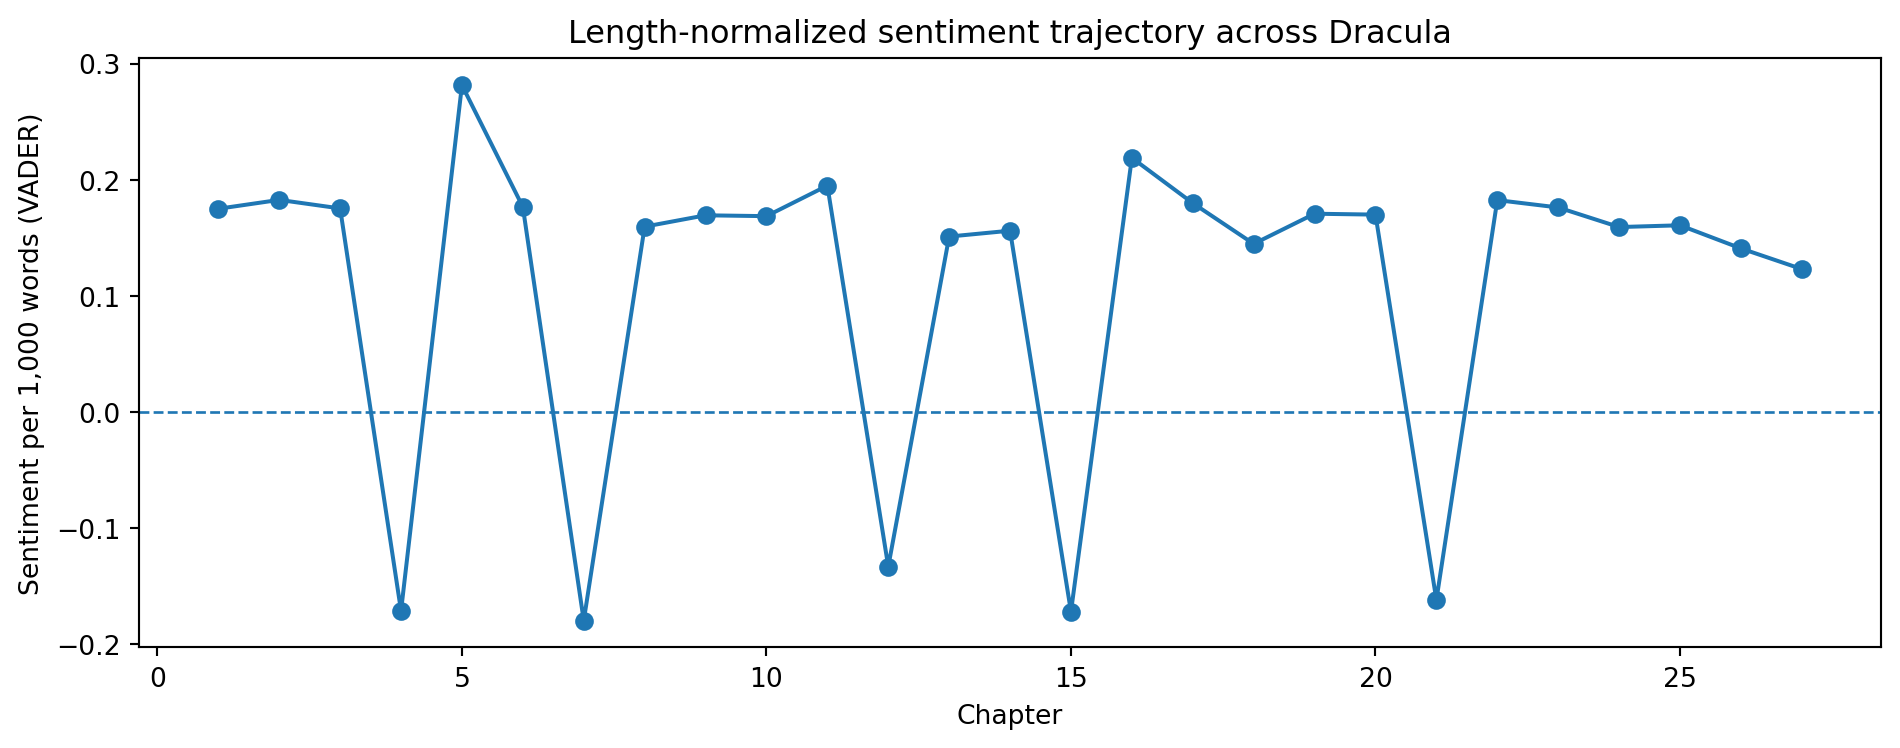

In [5]:
#| label: sentiment_line_plot_normalized
import matplotlib.pyplot as plt

plot_df = chap_df[chap_df["chapter"] > 0].sort_values("chapter")

plt.figure(figsize=(10, 4))
plt.plot(
    plot_df["chapter"],
    plot_df["sentiment_per_1k_words"],
    marker="o"
)
plt.axhline(0, linestyle="--", linewidth=1)
plt.xlabel("Chapter")
plt.ylabel("Sentiment per 1,000 words (VADER)")
plt.title("Length-normalized sentiment trajectory across Dracula")
plt.tight_layout()
plt.show()

In [6]:
#| label: sentiment_summary_save
# Save a short CSV with chapter order and sentiment (keeps labels unique)
chap_df[['chapter','marker','vader_compound']].to_csv("data/chapters_summary.csv", index=False)
print("Saved chapters_summary.csv")

Saved chapters_summary.csv


In [7]:
#| label: bigrams_stopwords_removed
import re
from nltk.corpus import stopwords
from collections import Counter

# ensure stopwords are available
nltk.download("stopwords", quiet=True)
stop_words = set(stopwords.words("english"))

tokens = []

for t in chap_df["text"]:
    # basic regex tokenization (no punkt dependency)
    words = re.findall(r"\b[a-zA-Z]+\b", t.lower())
    # remove stopwords and very short tokens
    words = [w for w in words if w not in stop_words and len(w) > 2]
    tokens.extend(words)

# build bigrams
bigrams = list(zip(tokens, tokens[1:]))
bigram_counts = Counter(bigrams)

top_bigrams = bigram_counts.most_common(50)

top_bigrams_df = pd.DataFrame(
    [{"bigram": f"{a} {b}", "count": c} for ((a, b), c) in top_bigrams]
)

top_bigrams_df.to_csv("data/top_bigrams.csv", index=False)
top_bigrams_df.head(20)


,bigram,count
0,van helsing,324
1,could see,103
2,madam mina,87
3,mrs harker,69
4,lord godalming,66
5,friend john,60
6,seward diary,47
7,last night,47
8,harker journal,40
9,poor dear,36


In [8]:
#| label: ner_spacy
# spaCy NER to extract GPE/LOC/FAC entities
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("spaCy model not installed. Run: python -m spacy download en_core_web_sm")
    raise

places = []
for i, row in chap_df.iterrows():
    doc = nlp(row['text'])
    for ent in doc.ents:
        if ent.label_ in ("GPE","LOC","FAC"):
            places.append(ent.text)

place_counts = pd.Series(places).value_counts().reset_index()
place_counts.columns = ['place','count']
place_counts.to_csv("data/place_counts_raw.csv", index=False)
place_counts.head(30)

,place,count
0,London,64
1,Carfax,24
2,Varna,19
3,Transylvania,14
4,Szgany,13
5,Amsterdam,13
6,Slovaks,11
7,England,11
8,Bukovina,8
9,the Borgo Pass,8


In [9]:
#| label: geocode_nominatim
# Geocode the top place candidates (Nominatim), cache to data/places_geocoded.csv
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
geocode_csv = Path("data/places_geocoded.csv")

if geocode_csv.exists():
    geocoded = pd.read_csv(geocode_csv)
else:
    geolocator = Nominatim(user_agent="dracula_text_miner")
    geocoded_rows = []
    top_places = place_counts.head(60)['place'].tolist()
    for place in top_places:
        try:
            time.sleep(1)
            loc = geolocator.geocode(place, timeout=10)
            if loc:
                geocoded_rows.append({'place': place, 'lat': loc.latitude, 'lon': loc.longitude})
        except (GeocoderTimedOut, GeocoderServiceError):
            continue
    geocoded = pd.DataFrame(geocoded_rows)
    geocoded.to_csv(geocode_csv, index=False)

geocoded.head()

,place,lat,lon
0,London,51.507446,-0.127765
1,Carfax,51.751978,-1.257934
2,Varna,43.207387,27.916665
3,Transylvania,35.198222,-82.772489
4,Amsterdam,52.373080,4.892453


In [10]:
#| label: folium_embed_map
# Make a folium map and embed it
if not geocoded.empty:
    m = folium.Map(location=[geocoded['lat'].mean(), geocoded['lon'].mean()], zoom_start=4)
    for _, r in geocoded.iterrows():
        folium.CircleMarker([r.lat, r.lon], radius=5, popup=str(r.place)).add_to(m)
    out_html = "data/places_map.html"
    m.save(out_html)
    display(IFrame(out_html, width="100%", height=600))
else:
    print("No geocoded places found.")

In [11]:
#| label: final_outputs
# Final save confirmations
print("Saved CSVs to data/: sentiment_by_chapter.csv, chapters_summary.csv, top_bigrams.csv, place_counts_raw.csv, places_geocoded.csv")

Saved CSVs to data/: sentiment_by_chapter.csv, chapters_summary.csv, top_bigrams.csv, place_counts_raw.csv, places_geocoded.csv
